In [108]:
import glob
import os
import pandas as pd
import matplotlib.pyplot as plt

In [109]:
path_summary = "/neurospin/dico/data/deep_folding/current/models/Champollion_V0/summary"

In [110]:
def plot_horizontal(res, region_name, ax, AUC_name, std_auc_name, AUC2_name, std_auc2_name, visible, title):
    labelsize=10
    ax.xaxis.set_tick_params(labelsize = labelsize)
    ax.yaxis.set_tick_params(labelsize = labelsize)
    
    res = res.sort_values(by=AUC_name, ascending=True)

    # ax.errorbar(res[AUC_name], res[region_name], res[std_auc_name], fmt='s', color='black')
    # ax.scatter(res[AUC_name], res[region_name], marker='s', color='black')
    ax.axvline(x=0.5, color='black', linestyle='-')
    ax.barh(res[region_name], res[AUC2_name], fill=True, color='lightgray')
    ax.errorbar(res[AUC_name], res[region_name], xerr=res[std_auc_name], fmt='s', color='black')
    # if visible:
    #     ax.set_ylabel("AUC ensemble")
    # else:
    #     ax.get_yaxis().set_ticks([])
    ax.set_xlim((0.45, 1.0))
    ax.set_title(title)


In [111]:
files_to_display = glob.glob(f"{path_summary}/*")

Treating /neurospin/dico/data/deep_folding/current/models/Champollion_V0/summary/isRightHanded60vsLeftHanded60_hcp_without_residualization.csv


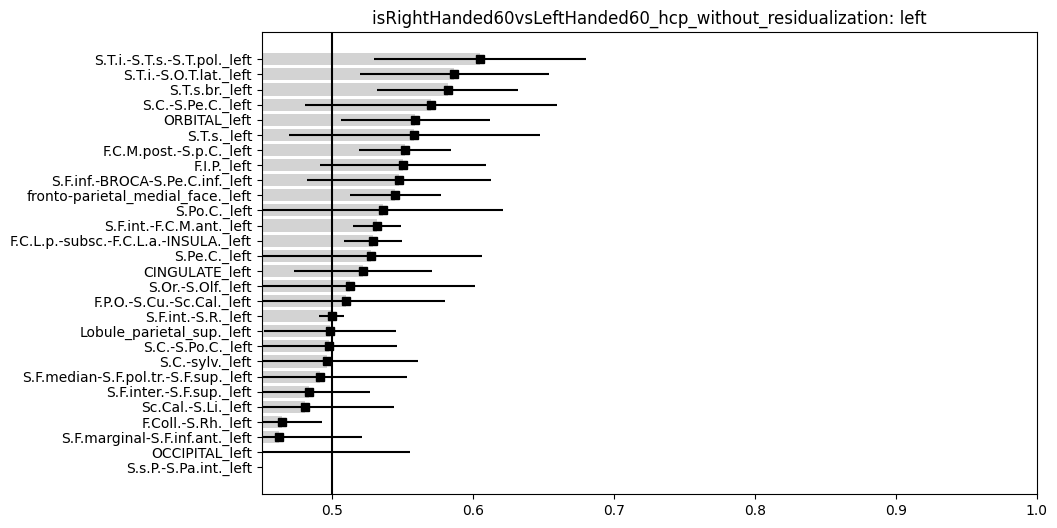

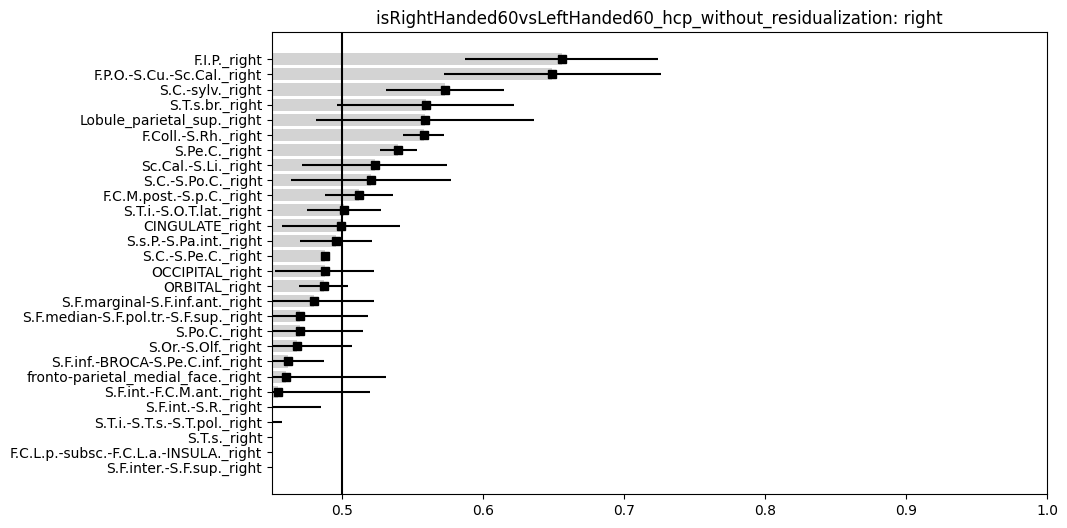

Treating /neurospin/dico/data/deep_folding/current/models/Champollion_V0/summary/isStronglyRightHanded_hcp_without_residualization.csv


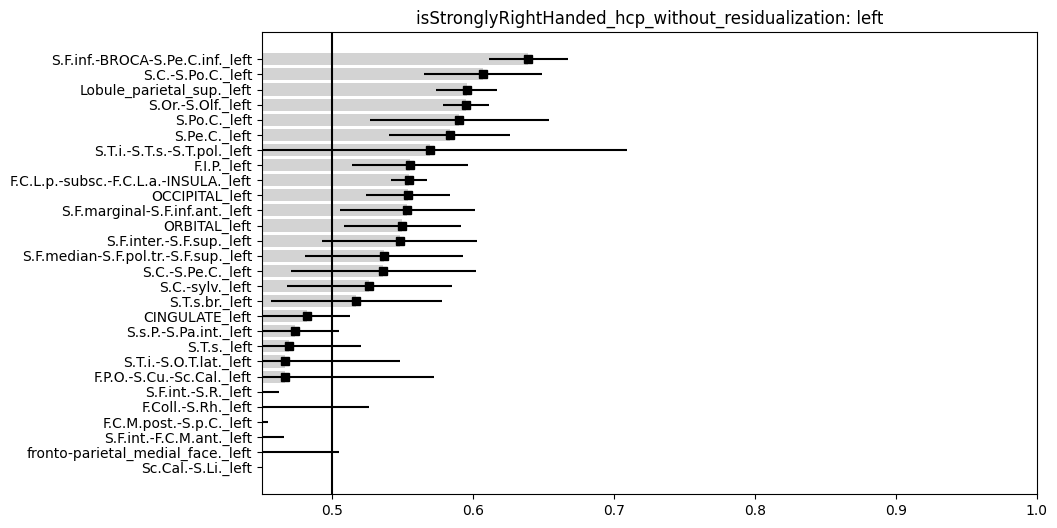

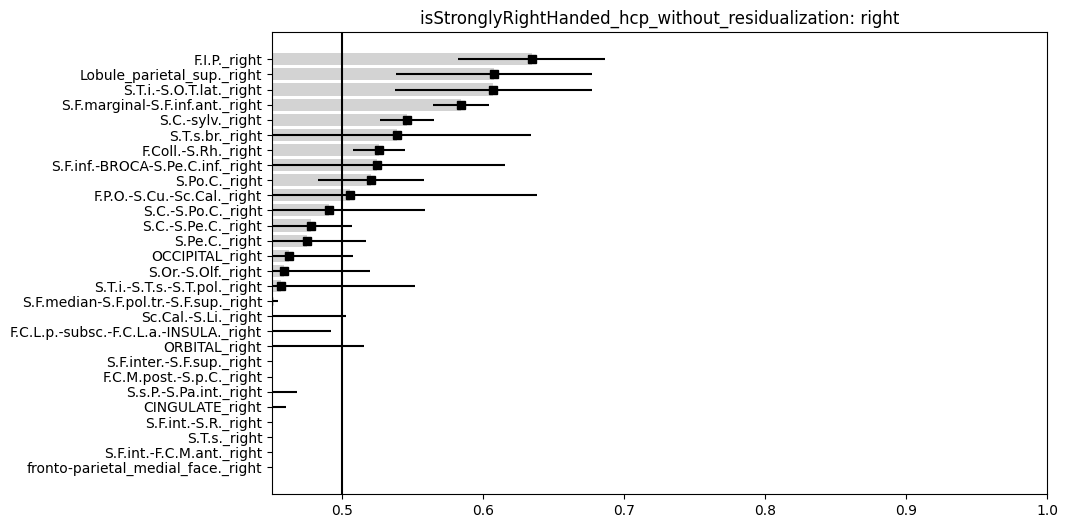

Treating /neurospin/dico/data/deep_folding/current/models/Champollion_V0/summary/Sex_ukb_without_residualization.csv


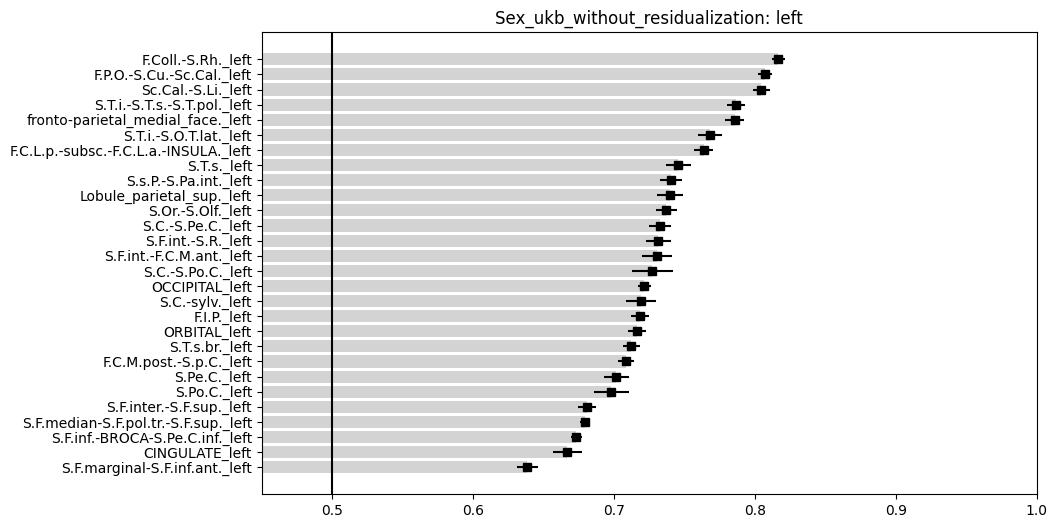

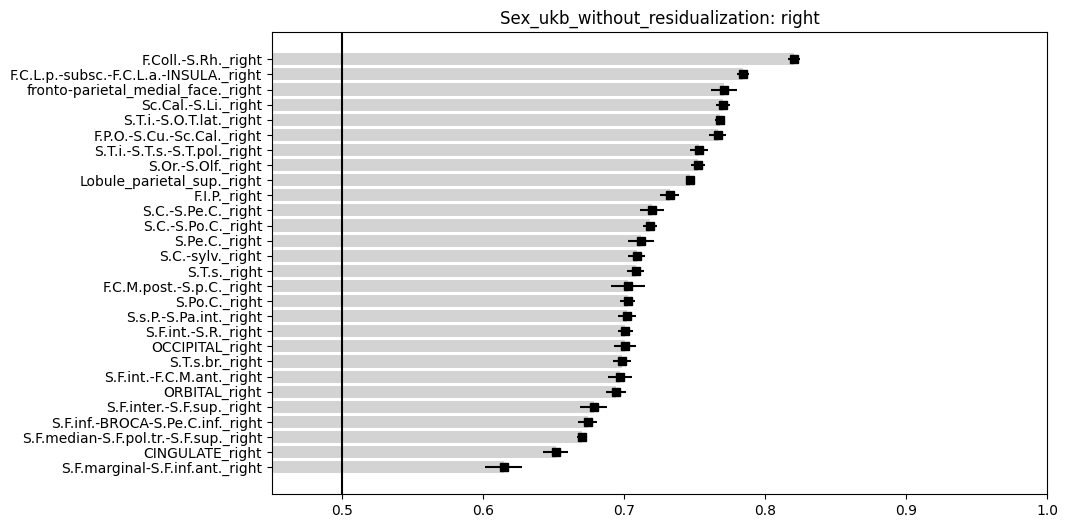

Treating /neurospin/dico/data/deep_folding/current/models/Champollion_V0/summary/SexSmallBrain_ukb_without_residualization.csv


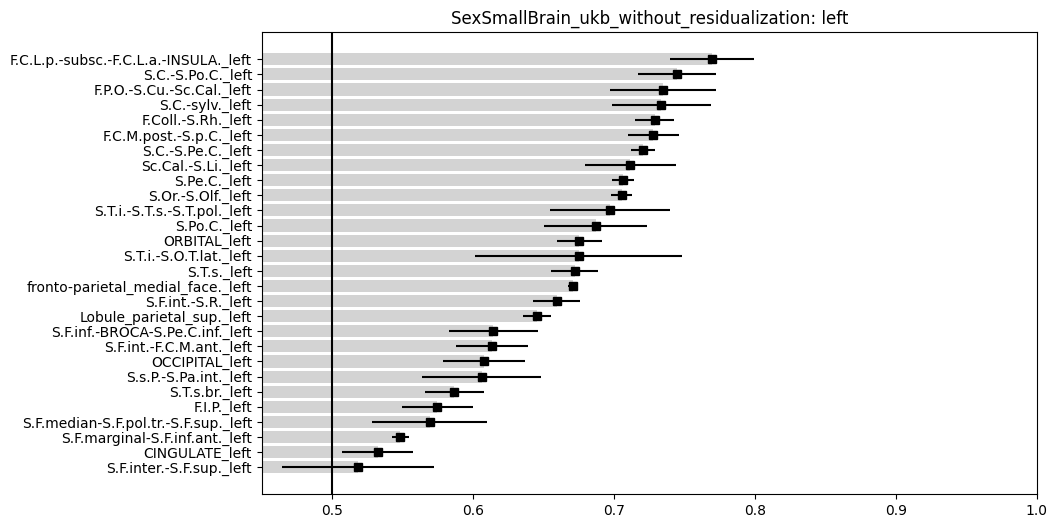

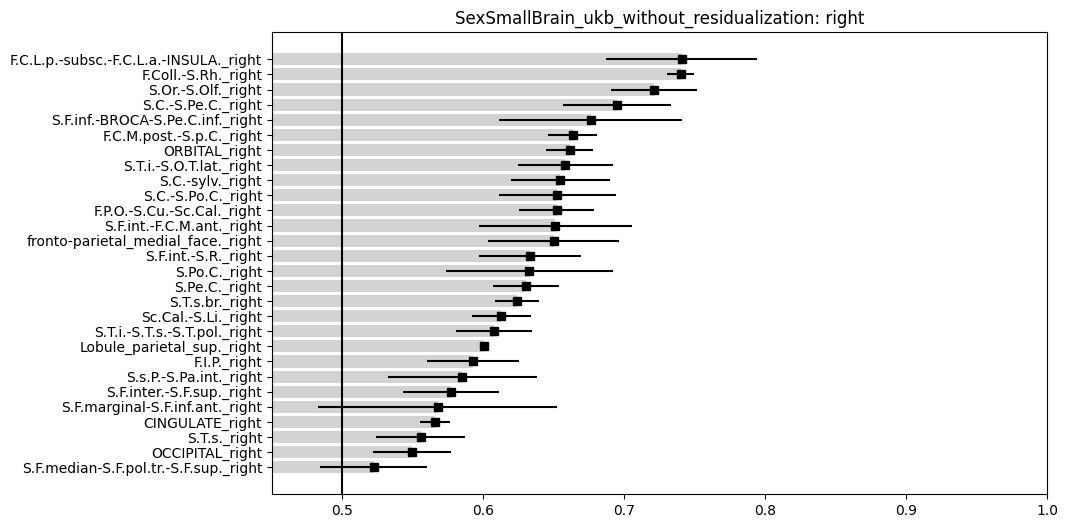

Treating /neurospin/dico/data/deep_folding/current/models/Champollion_V0/summary/isBigBrain_ukb_sex_balanced.csv


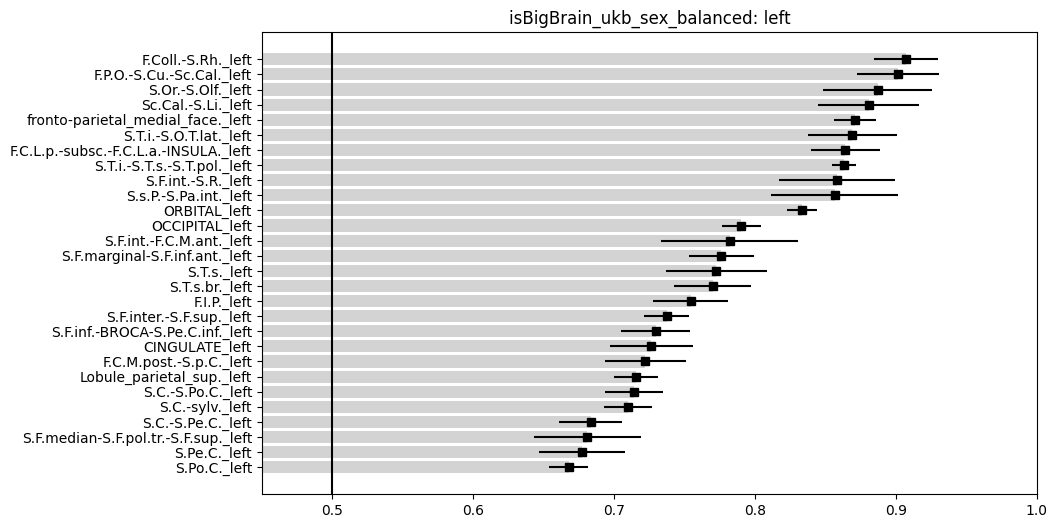

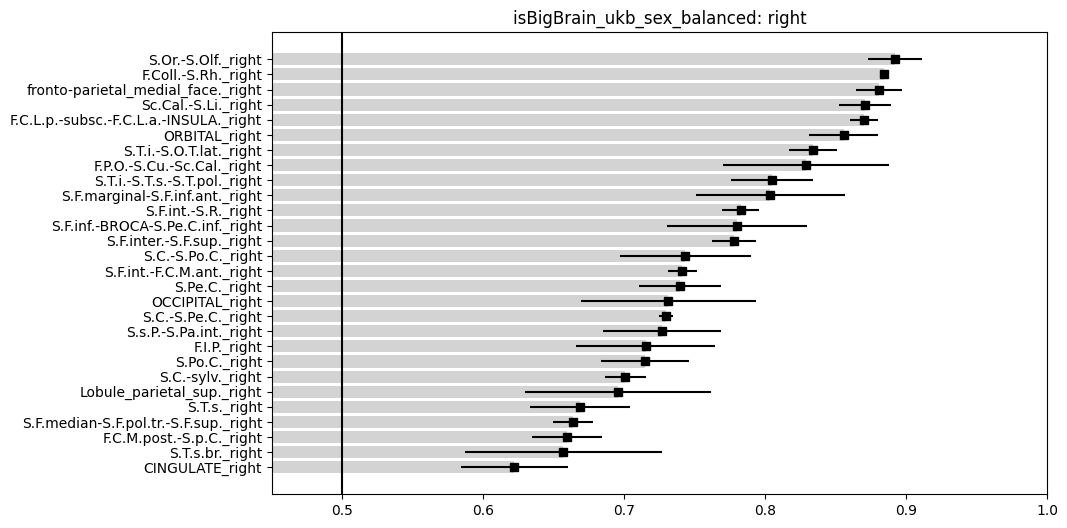

Treating /neurospin/dico/data/deep_folding/current/models/Champollion_V0/summary/isStronglyRightHandedvsOthers_hcp_without_residualization.csv


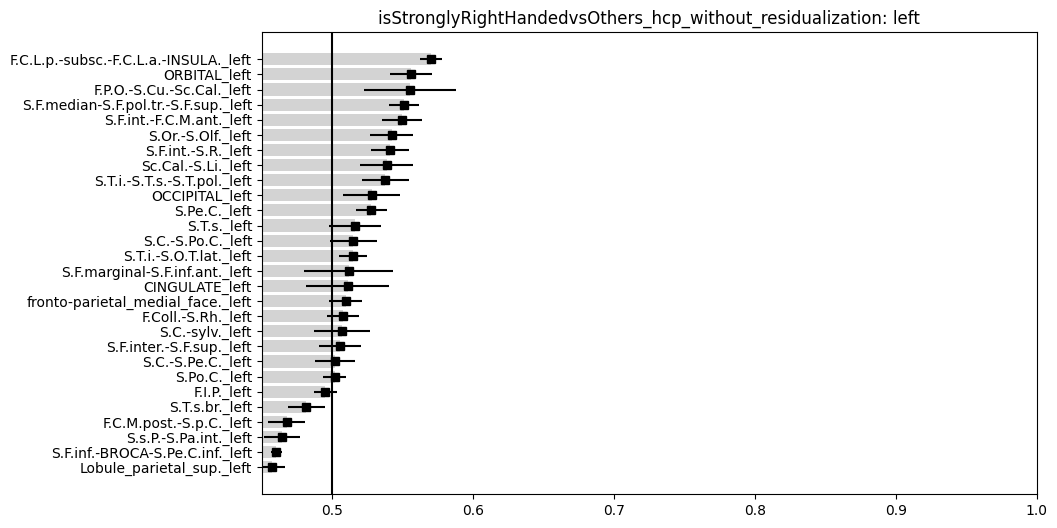

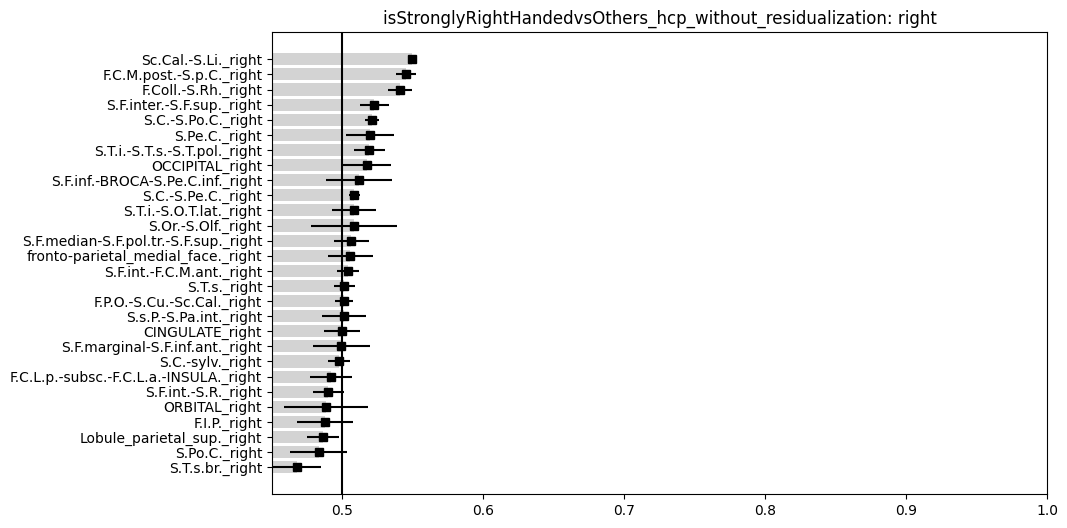

Treating /neurospin/dico/data/deep_folding/current/models/Champollion_V0/summary/isBigBrain_ukb_without_residualization.csv


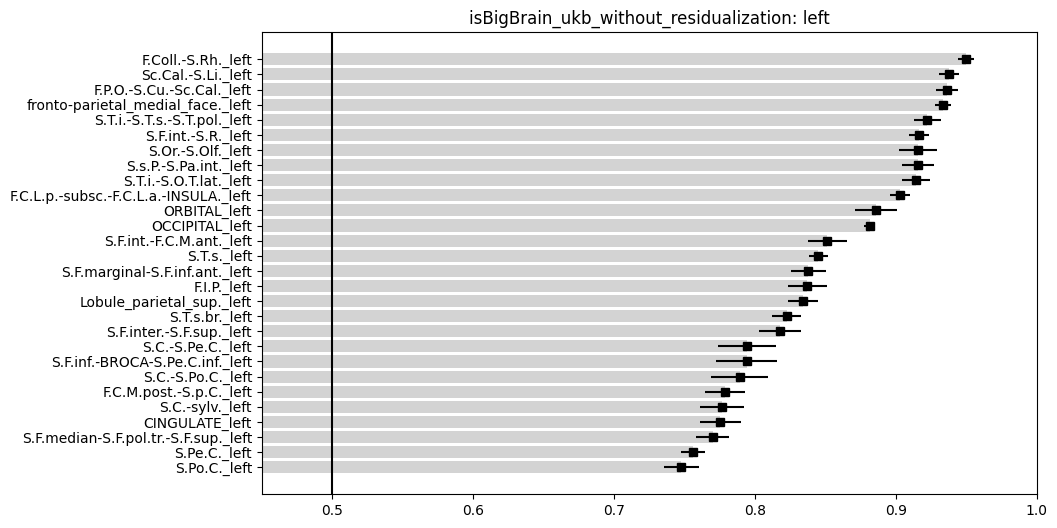

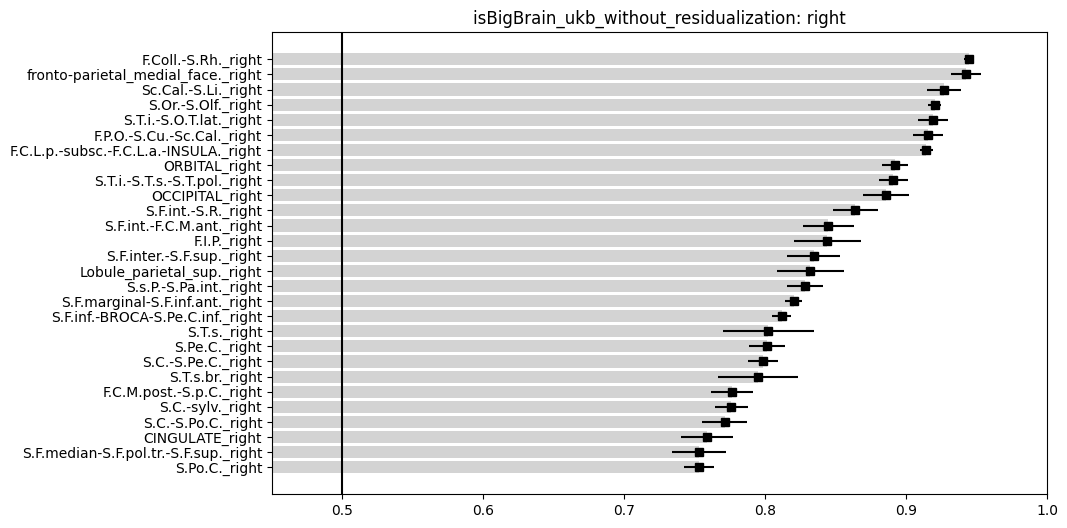

Treating /neurospin/dico/data/deep_folding/current/models/Champollion_V0/summary/isRightHanded_hcp_without_residualization.csv


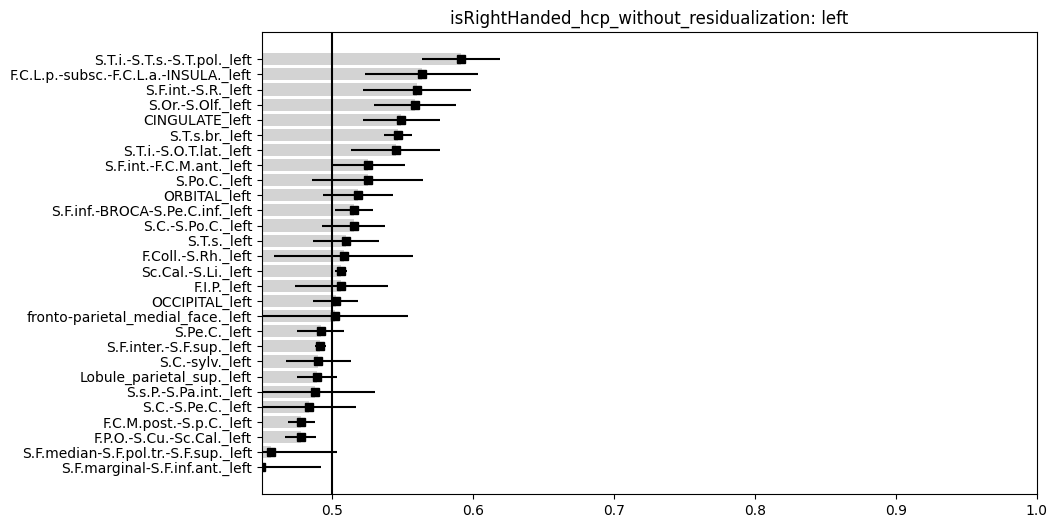

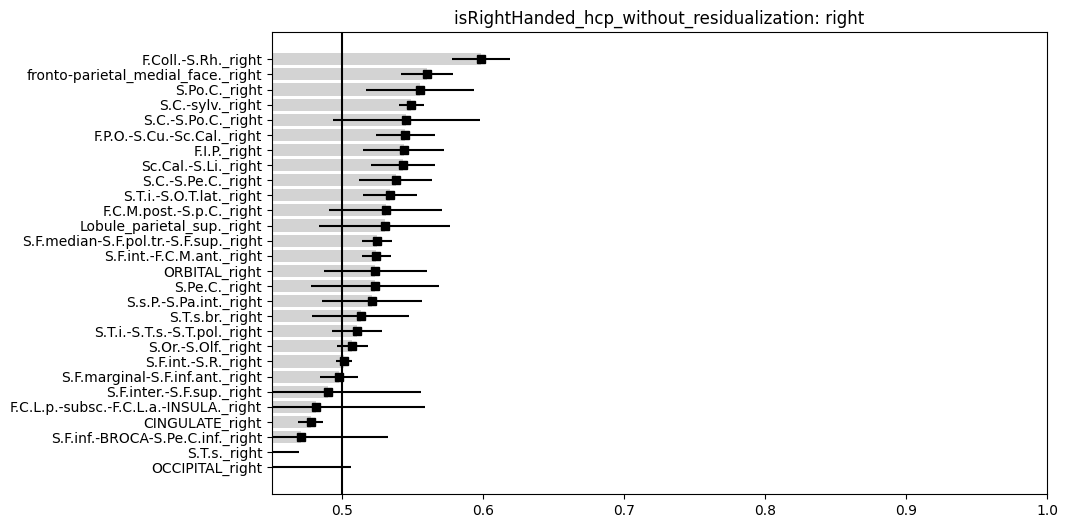

Treating /neurospin/dico/data/deep_folding/current/models/Champollion_V0/summary/isStronglyRightHandedvsLeftHanded_hcp_without_residualization.csv


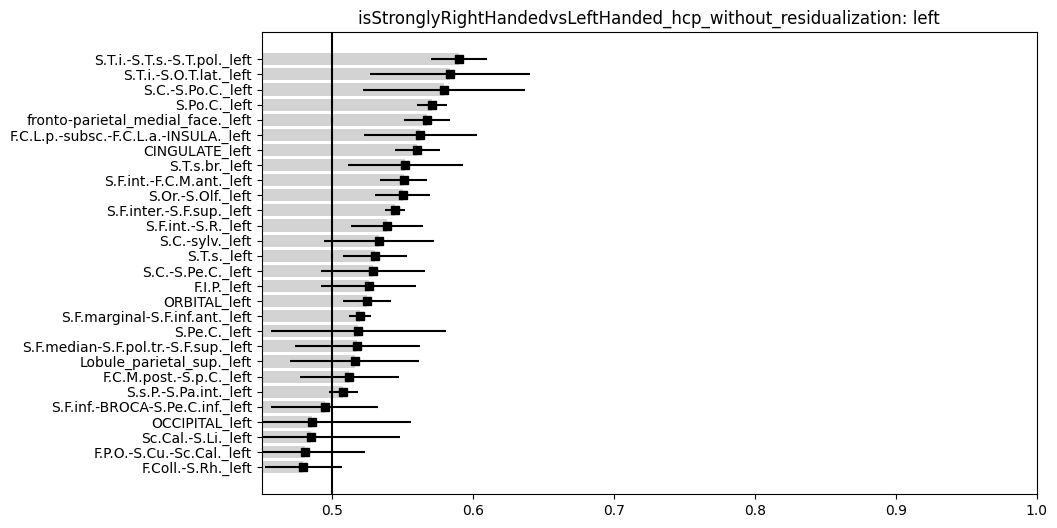

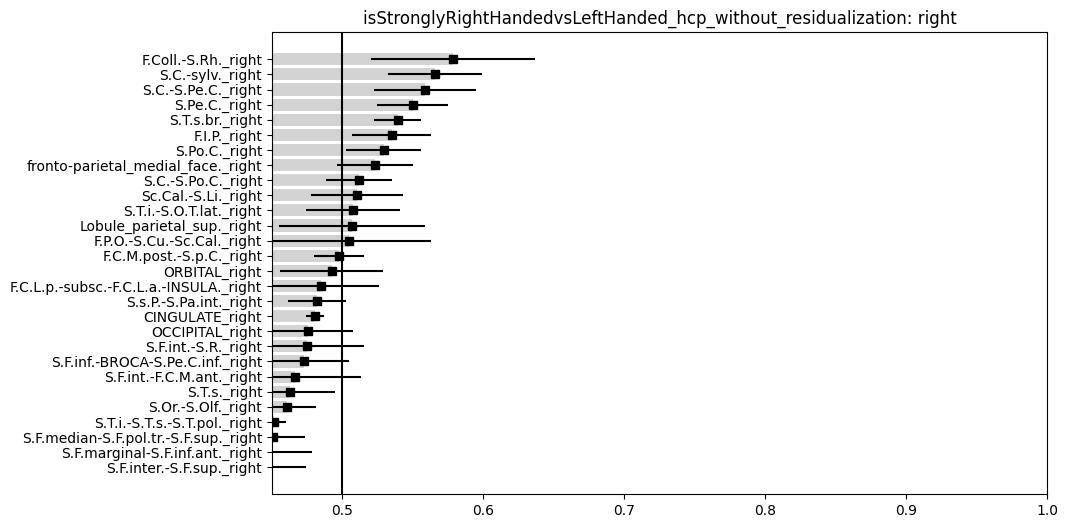

Treating /neurospin/dico/data/deep_folding/current/models/Champollion_V0/summary/isStronglyLeftHandedvsOthers_hcp_without_residualization.csv


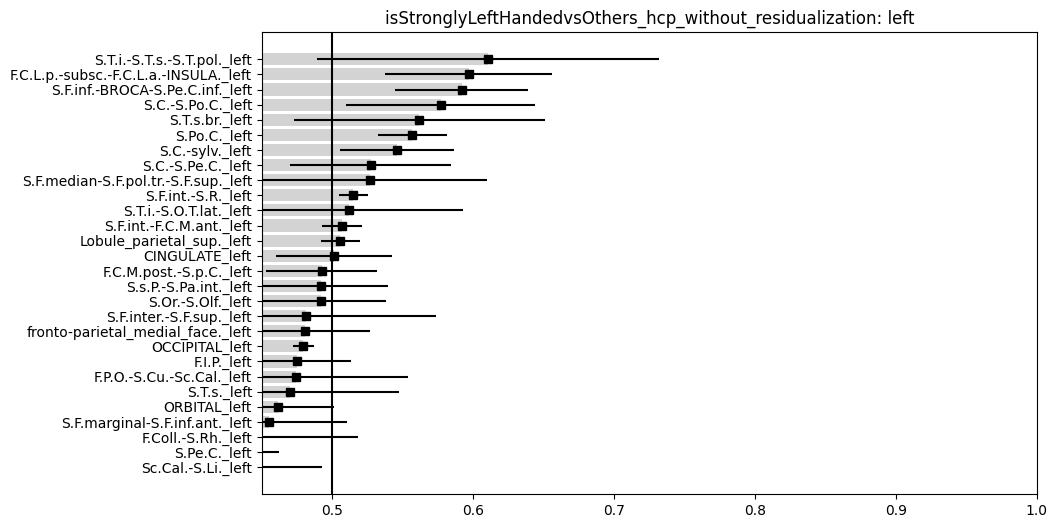

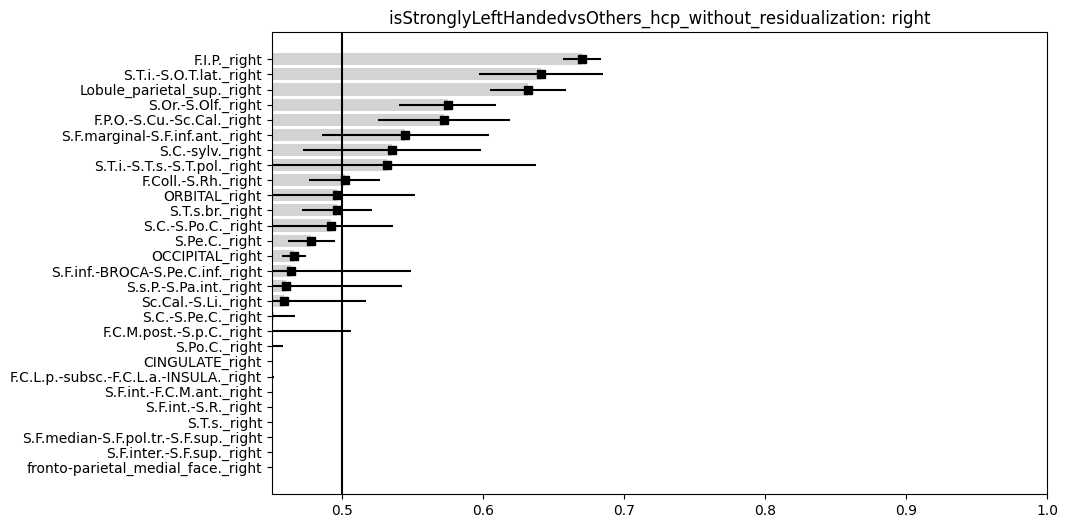

Treating /neurospin/dico/data/deep_folding/current/models/Champollion_V0/summary/isOld_ukb_without_residualization.csv


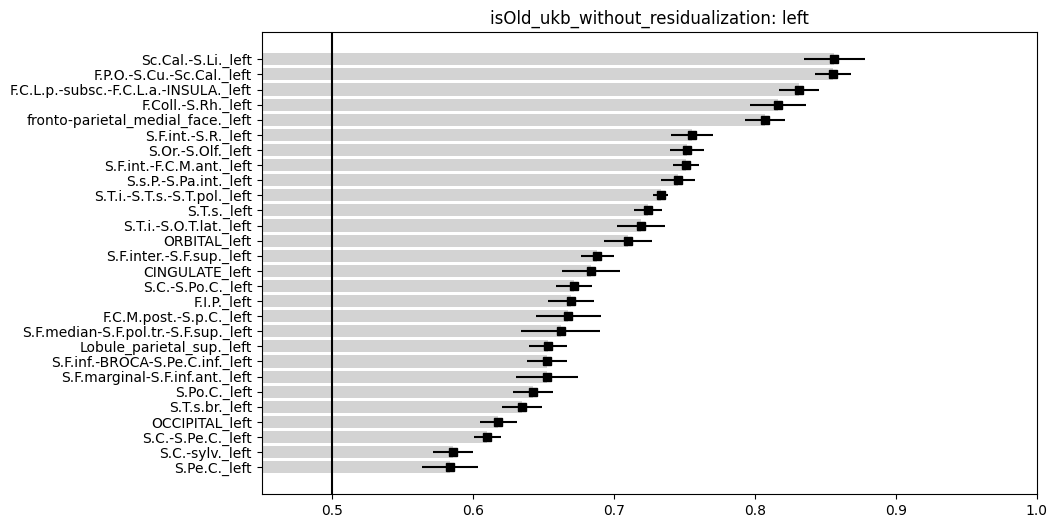

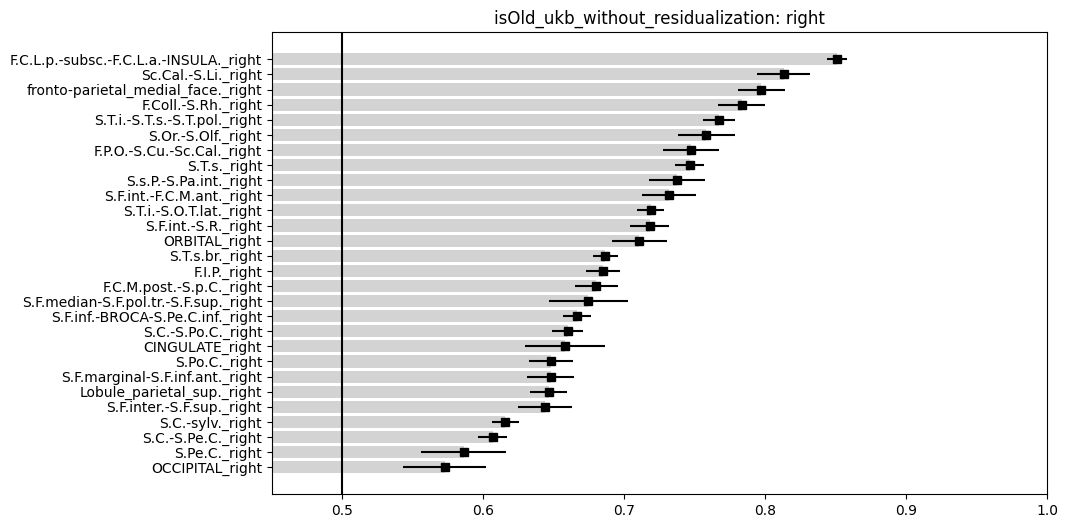

Treating /neurospin/dico/data/deep_folding/current/models/Champollion_V0/summary/site_hcp_ukb_younger_without_residualization.csv


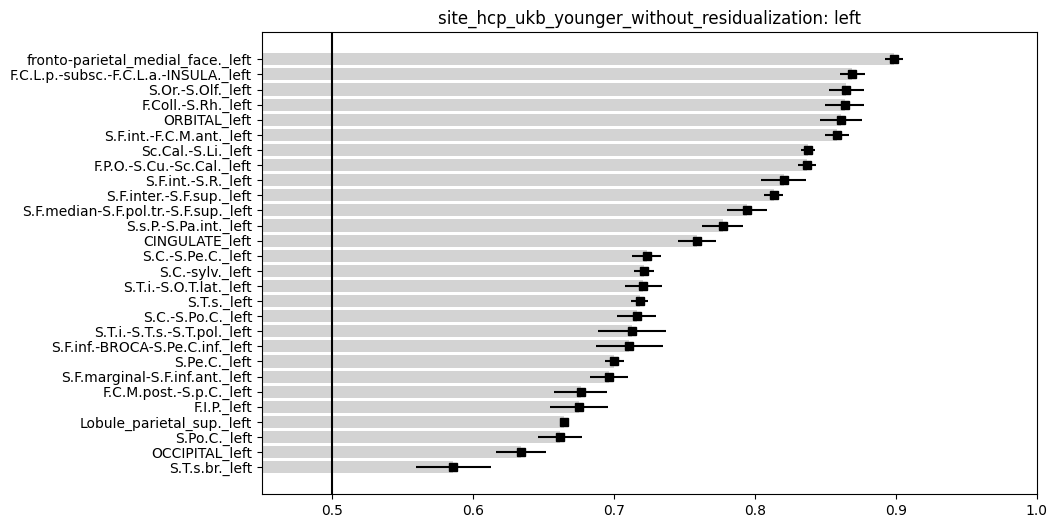

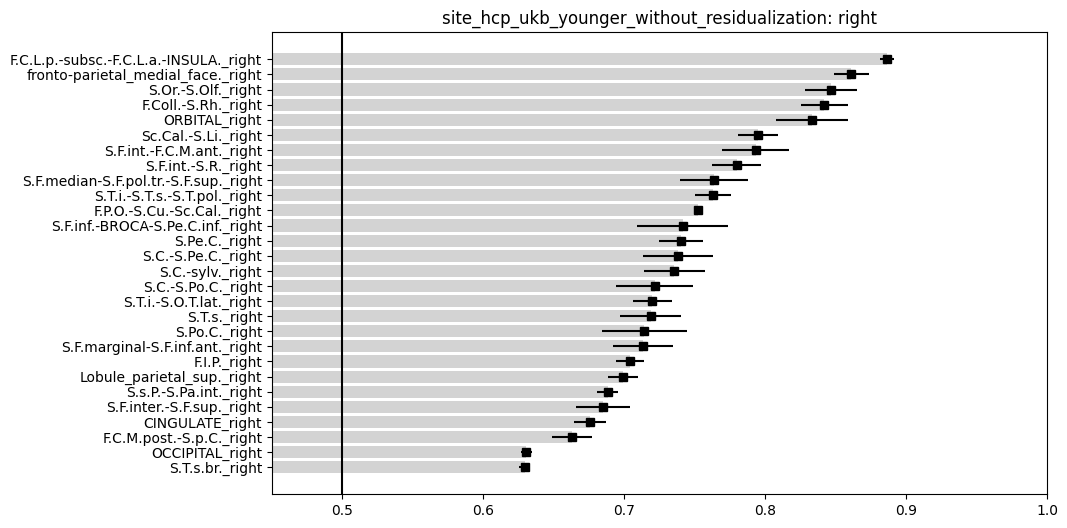

In [112]:
for file_to_display in files_to_display:
    print(f"Treating {file_to_display}")
    df = pd.read_csv(file_to_display, index_col=0)
    df = pd.read_csv(file_to_display, index_col=0)[["region", "roc_auc", "roc_auc_std"]]
    df = df.groupby(['region']).mean()
    df["side"] = df.index.str.split('_').str[-1]

    df = pd.read_csv(file_to_display, index_col=0)
    df = pd.read_csv(file_to_display, index_col=0)[["region", "roc_auc", "roc_auc_std"]]
    df = df.groupby(['region']).mean()
    df["side"] = df.index.str.split('_').str[-1]
    df = df.reset_index()

    test_done = os.path.basename(file_to_display).split('.')[0]

    plt.rc('axes', labelsize=12) 
    f, ax = plt.subplots(1, 1, figsize=(10, 6))
    plot_horizontal(df[df.side=='left'], "region", ax, "roc_auc", "roc_auc_std", "roc_auc", "roc_auc_std", True, 
                    f"{test_done}: left")
    plt.show()

    plt.rc('axes', labelsize=12) 
    f, ax = plt.subplots(1, 1, figsize=(10, 6))
    plot_horizontal(df[df.side=='right'], "region", ax, "roc_auc", "roc_auc_std", "roc_auc", "roc_auc_std", True,
                    f"{test_done}: right")
    plt.show()